In [9]:
###############################################################################
# Written by Artem Davydov in fullfillment of the CTA200H project requirement #
###############################################################################

In [10]:
###############################################################################
###################### QUESTION 1: Importing RM Tools #########################
###############################################################################

# Tool installation step: Uncomment line below and install the RM Synthesis 
# tool if not installed

# !pip install RM-Tools

import numpy as np
import matplotlib.pyplot as plt
from RMtools_1D.do_RMsynth_1D import run_rmsynth

In [11]:
###############################################################################
###################### QUESTION 2: Simulating Q and U #########################
###############################################################################

def stokesQU(freqs, fdepth, chi0, pint):
    """
    
    Calcuates the stokes Q and U given Faraday Depth

    Parameters
    ----------
    freqs : float
        The frequnecies of the associated polarized observation/s [Hz]
    fdepth : float
        The faraday depth (phi) [rad/m^2]
    chi0: float
        Intrinsic polarization angle of polarized source [0,180) [deg]
    pint: float
        Polarized intensity along LOS (line of sight)

    Returns
    -------
    array
        a numpy array of the simulates Stokes Q and U in the order
        Q+iU
    """
    c0 = 299792458  # speed of light(vacuum) [m/s]
    chi0rad = np.deg2rad(chi0)
    Q = pint*np.cos(2*(chi0rad+fdepth*(c0/freqs)**2))
    U = pint*np.sin(2*(chi0rad+fdepth*(c0/freqs)**2))
    return Q+1j*U
###############################################################################

In [23]:
###############################################################################
######################## QUESTION 3: Plotting Q and U #########################
###############################################################################
def plotQU(stokesq, stokesu, freqs, saveplot = False,
           fname = "simulatesQU.pdf"):
    """
    Plots the a given set of stokes Q and U and saves the plots if requested

    Parameters
    ----------
    stokesq : float
        Stokes Q
    stokesu : float
        Stokes U
    freqs : float
        Frequnecies corresponding to the Stokes Q and U
    saveplot : Boolean, False
        Do you want to save a .pdf of the plot?
    fname :  String, "simulatesQU.pdf"
        Name of the saved pdf of the Stokes Q and U

    Returns
    -------
    None
        
    """
    # Define plot label strings
    y_label = "Flux Density(Jy/Beam)"
    x_label = "Frequency (Hz)"
    common_title = "Simulated Stokes "
    # Initialize figure and axis for the Q and U plots
    fig, axs = plt.subplots(2, sharex = True)
    # Set the title of the sub plots and plot
    axs[0].set_title(common_title+"Q")
    axs[0].plot(freqs, stokesq)
    axs[1].set_title(common_title+"U")
    axs[1].plot(freqs, stokesu)
    # Set axi labels and tighten the layout
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    fig.tight_layout()
    
    # If user flagged plot to be saved, save in current directory
    if(saveplot):
        plt.savefig(fname)
###############################################################################

In [27]:
# Make a utility dictionary of survey frequnecy ranges to use for sims
# The units are in Hz, the bin number correpsonds to channel count

# Useful unit factors
mhz = 1E+6
ghz = 1E+9
# Dictionary of frequnecy ranges binned to match the surveys
survey_freqs = {"LOFAR": np.linspace(120*mhz, 178*mhz, 488, endpoint = True),
                "ASKAP": np.linspace(800*mhz, 1088*mhz, 288, endpoint = True),
                "VLASS_coarse": np.linspace(2*ghz, 4*ghz, 16, endpoint = True),
                "VLASS_fine": np.linspace(2*ghz, 4*ghz, 128, endpoint = True),
                "GMIMS": np.linspace(300*mhz, 480*mhz, 360, endpoint = True)
               }



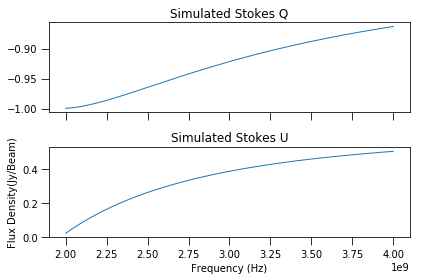

In [68]:
# This cell is used to test the Q and U plotting function
sc = "VLASS_fine"  # survey choice
lofar_qu = stokesQU(survey_freqs[sc], 15, 70, 1)


lofar_qu_1 = stokesQU(survey_freqs[sc], 0, 40, 1)

x = np.real(lofar_qu)
y = np.imag(lofar_qu)
dx = np.ones_like(survey_freqs[sc])*0.01
dy = np.ones_like(survey_freqs[sc])*0.01

x1 = np.real(lofar_qu_1)
y1 = np.real(lofar_qu_1)

plotQU(x, y, survey_freqs[sc], True, "nophi.pdf")

In [69]:
###############################################################################
################### QUESTION 5: Farday Simple Example #########################
###############################################################################

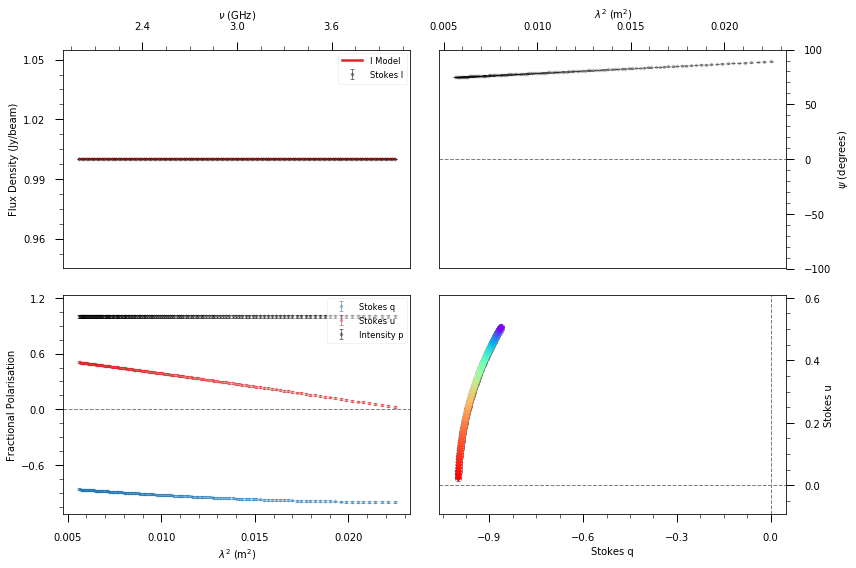

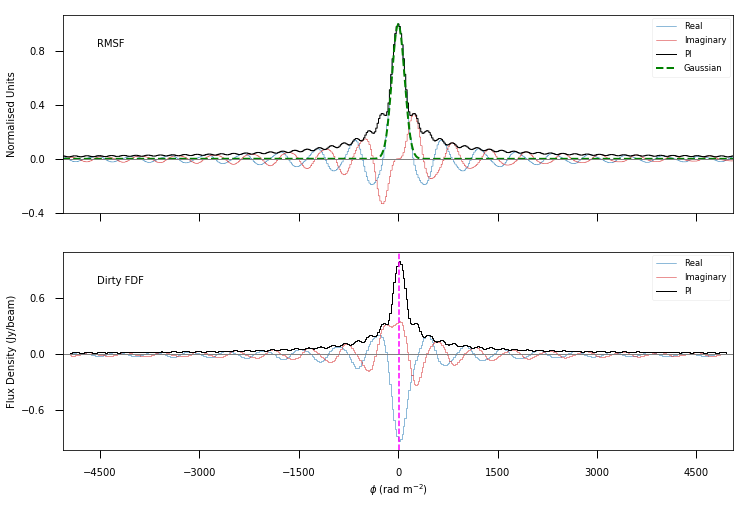

In [70]:
rm_results = run_rmsynth([survey_freqs[sc], x, y, dx, dy], showPlots = True)


In [30]:
# plt.figure(figsize=(10,10))
# plt.plot(np.real(rm_results[1]["phi2Arr_radm2"]), np.abs(rm_results[1]["RMSFArr"]))
# plt.xlim(-10,10)

# plt.plot(np.abs(rm_results[1]["dirtyFDF"]))

In [31]:
###############################################################################
################## QUESTION 6: Farday Complex Example #########################
###############################################################################

<Figure size 432x288 with 0 Axes>

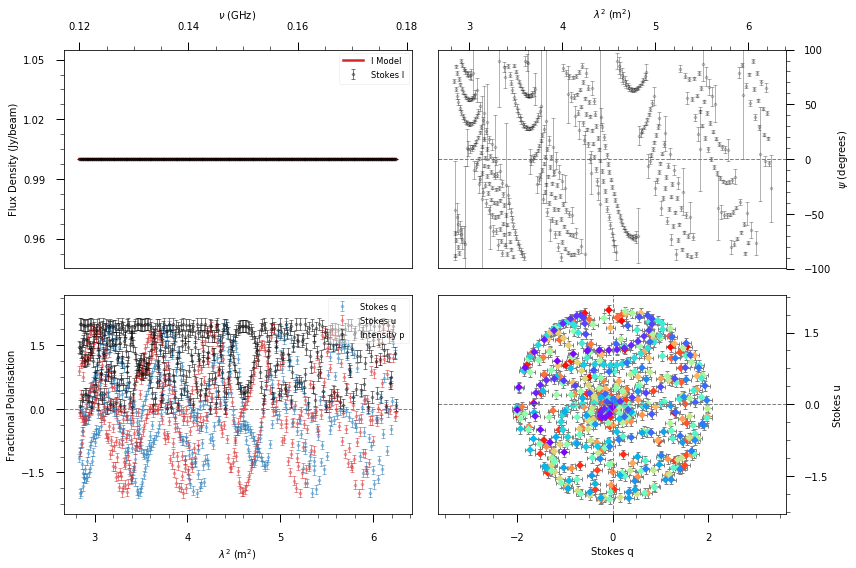

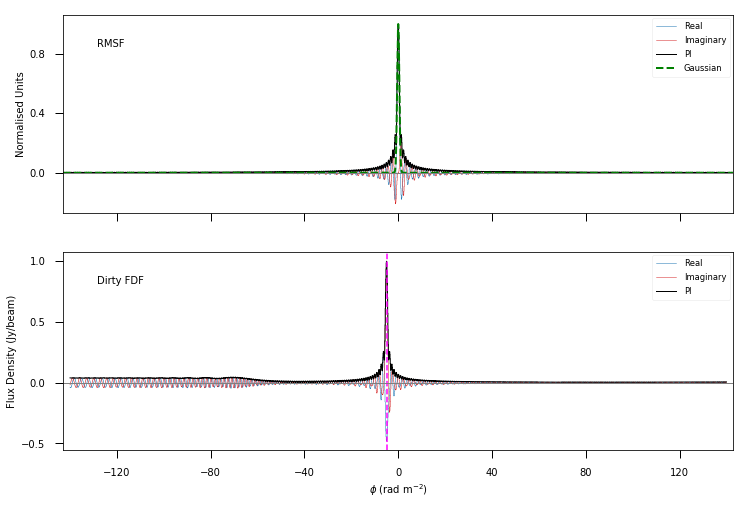

In [80]:
# I will explore the behaviour of a more complex case 
# I will concentrate on the response of the rmsynth function to
# different relative rotation angles and Faraday depths

survey_choice = "LOFAR"
chi0 = 5
phi0 = -5
delta_chi = 32 # intrnsic polarization angle of source
delta_phi = 200 # difference between the rotation of different sources
polarized_int = 1  # polarized intesity for both sources in Jy/Beam
dq = np.ones_like(survey_freqs[survey_choice])*(0.1)
du = dq


source1qu = stokesQU(survey_freqs[survey_choice], phi0, chi0, polarized_int)
source2qu = stokesQU(survey_freqs[survey_choice], phi0+delta_phi, chi0+delta_chi, polarized_int)

plt.figure()
rm_results = run_rmsynth([survey_freqs[survey_choice], np.real(source1qu)+np.real(source2qu), np.imag(source1qu) + np.imag(source2qu), dq, du], showPlots = True)
